In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [3]:
#настройки
pd.max_colwidth = -1

In [4]:
pd.set_option('max_colwidth', -1)
data = pd.read_csv('/datasets/hypothesis.csv') #('/datasets/hypothesis.csv' для облака)
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
data.rename(columns={
    'Hypothesis' : 'hypothesis',
    'Reach': 'reach',
    'Impact':'impact',
    'Confidence':'confidence',
    'Efforts':'efforts'
}, inplace=True)

Прочитаем поудобней полное описание гипотез:

In [7]:
for i in range(0,len(data.hypothesis)):
    print('Гипотеза №', i, data['hypothesis'][i])
    print('------')

Гипотеза № 0 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
------
Гипотеза № 1 Запустить собственную службу доставки, что сократит срок доставки заказов
------
Гипотеза № 2 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
------
Гипотеза № 3 Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
------
Гипотеза № 4 Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
------
Гипотеза № 5 Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
------
Гипотеза № 6 Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
------
Гипотеза № 7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
------
Гипотеза № 8 Запустить акцию, дающую скидку на товар в день рождения
------


In [8]:
#примением ICE фреймворк
data["ICE"] = (data.impact * data.confidence / data.efforts).round(2)
print(data[['hypothesis', "ICE"]].sort_values('ICE', ascending=False))

                                          hypothesis    ICE
8  Запустить акцию, дающую скидку на товар в день...  16.20
0  Добавить два новых канала привлечения трафика,...  13.33
7  Добавить форму подписки на все основные страни...  11.20
6  Показать на главной странице баннеры с актуаль...   8.00
2  Добавить блоки рекомендаций товаров на сайт ин...   7.00
1  Запустить собственную службу доставки, что сок...   2.00
5  Добавить страницу отзывов клиентов о магазине,...   1.33
3  Изменить структура категорий, что увеличит кон...   1.12
4  Изменить цвет фона главной страницы, чтобы уве...   1.00


In [9]:
#применим Rice и сразу выведем ICE для сравнения и данные о reach
data["RICE"] = data.impact * data.confidence * data.reach/ data.efforts
print(data[['hypothesis', "RICE", 'ICE', 'reach']].sort_values('RICE', ascending=False))

                                          hypothesis   RICE    ICE  reach
7  Добавить форму подписки на все основные страни...  112.0  11.20     10
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0   7.00      8
0  Добавить два новых канала привлечения трафика,...   40.0  13.33      3
6  Показать на главной странице баннеры с актуаль...   40.0   8.00      5
8  Запустить акцию, дающую скидку на товар в день...   16.2  16.20      1
3  Изменить структура категорий, что увеличит кон...    9.0   1.12      8
1  Запустить собственную службу доставки, что сок...    4.0   2.00      2
5  Добавить страницу отзывов клиентов о магазине,...    4.0   1.33      3
4  Изменить цвет фона главной страницы, чтобы уве...    3.0   1.00      3


В рейтинге заметно следующее:
- взлетели гипотезы с очень высоким reach, а именно №7 и №2. 
- резко потеряла лидерство  гипотеза 8 (скидка на ДР) из-за reach, равного 1. 
- нулевая гипотеза тоже потеряла, но не очень сильно, поскольку ее значение reach равна модальному значению reach в рейтинге гипотез.

Интересно, что Rice  дает еще и немного другое восприятие приоритетов из-за дополнительного мультипликатора: разброс между индексами Rice очень большой и мотивирует уделить гипотезе №7 из-за его высокого показателя reach.

## Часть 2

In [10]:
orders = pd.read_csv('/datasets/orders.csv', nrows=5) #('datasets/orders.csv' для облака)
visitors = pd.read_csv('/datasets/visitors.csv', nrows=5) # '/datasets/visitors.csv' для облака

for df in [orders, visitors]:
    print (df)
    

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756


In [11]:
#csv нормально считались, загружаем полностью

orders = pd.read_csv('/datasets/orders.csv') #('datasets/orders.csv' для облака)
visitors = pd.read_csv('/datasets/visitors.csv') # '/datasets/visitors.csv' для облака

In [12]:
print(orders.info())
print('----------')
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


In [13]:
#преобразуем в нужных столбцах инфу в формат даты. Другие столбцы трогать не будем ввиду очень маленьких датасетов
for df in [orders, visitors]:
    df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')


In [14]:
print(orders.info())
print('----------')
print(visitors.info())
#все прошло нормально

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


In [15]:
#нам нужны установить, для каких дат есть информация в каждой группе
datesGroups = orders[['date','group']].drop_duplicates() 

In [16]:
ordersAggregated = datesGroups.apply(
                    lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                    orders['group'] == x['group'])].
                                    agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 
                                         'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1
                                        ).sort_values(by=['date','group'])

In [17]:
visitorsAggregated = datesGroups.apply(
                        lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                          visitors['group'] == x['group'])].
                                            agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1
                                                ).sort_values(by=['date','group'])

In [18]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])


In [19]:
cumulativeData

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [20]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [21]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

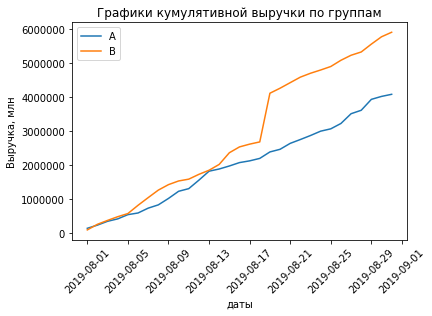

In [22]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend() 
plt.xticks(rotation=45)

plt.xlabel('даты')
plt.ylabel('Выручка, млн')
plt.title('Графики кумулятивной выручки по группам');

Сначала графики кумулятивной выручки ведут себя схожим образом, но в районе 18 августа проихсодит резкий скачок выручки в группе B, почти наверняка связанный с каким-то из ряда вон выходящим заказом (или заказами). После этого графики снова начинают двигаться практически параллельно. Есть серьезная вероятность, что в выборках, очищенных от выбросов, результат может оказаться совершенно иным.

In [23]:
cumulativeRevenueA['avg_check'] = cumulativeRevenueA['revenue']/cumulativeRevenueA['orders']
cumulativeRevenueB['avg_check'] = cumulativeRevenueB['revenue']/cumulativeRevenueB['orders']

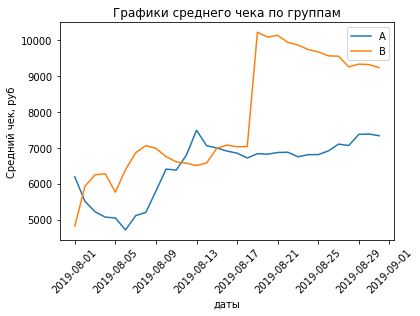

In [24]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.xticks(rotation=45)

plt.xlabel('даты')
plt.ylabel('Средний чек, руб')
plt.title('Графики среднего чека по группам');

Мы также видим резкий скачок среднего чека в группе B, почти на 50%, а затем показатель снижается. В группе A  после некоторого провала в начале месяца средний чек стабилизируется на уровне примерно 7 тыс.

Text(0.5, 1.0, 'Относительные различия средних чеков по группам')

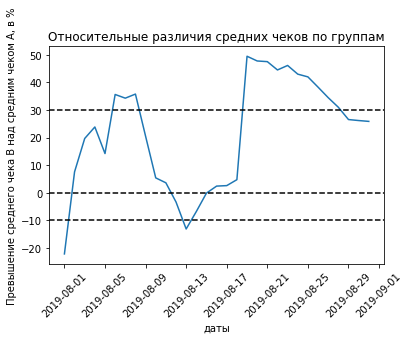

In [25]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], 
         ((mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)*100)

plt.xticks(rotation=45)
plt.xlabel('даты')
plt.ylabel('Превышение среднего чека B над средним чеком А, в %')
plt.axhline(y=30, color='black', linestyle='--') 
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=-10, color='black', linestyle='--') 
plt.title('Относительные различия средних чеков по группам')

График очень ломанный и с большим разбросом, весьма трудно составить какое-то впечатление.

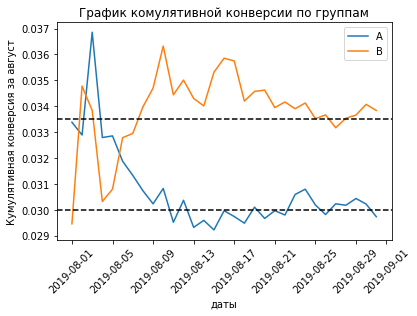

In [26]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.xticks(rotation=45)
plt.title('График комулятивной конверсии по группам')

plt.xlabel('даты')
plt.ylabel('Кумулятивная конверсия за август')

plt.axhline(y=0.03, color='black', linestyle='--') 
plt.axhline(y=0.0335, color='black', linestyle='--') 

К концу месяца конверсии более-менее стабилизируются в обоих группах, примерно на уровне  0.0335 в группе B и 0.03 в группе А. 

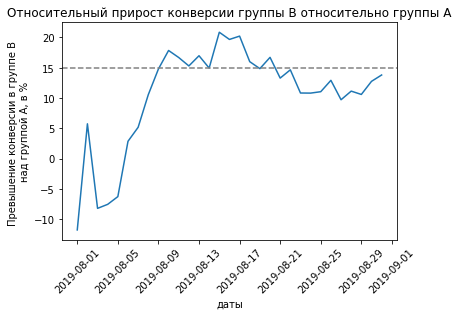

In [27]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
                                cumulativeDataB[['date','conversion']], 
                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], 
         (mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)*100)
plt.title("Относительный прирост конверсии группы B относительно группы A")

plt.xlabel('даты')
plt.ylabel('Превышение конверсии в группе B \nнад группой А, в %')
plt.axhline(y=15, color='grey', linestyle='--')
plt.xticks(rotation=45);

Относительный график различий имеет более широкий разброс, но в целом складывается впечатление, что показатель тяготеет примерно к показателю 0.15 прироста в группе B по сравнению с группой A.

### Промежуточный вывод
Складывается впечатление, что в целом группа B показывает значимое различие по сравнению с группой А и по выручке, и по чеку, и по конверсии, но необходимо установить роль выбросов, а также провести формальное статистическое исследование.

### Анализ выбросов
Построим графики выбросов по выручке и по количеству заказов, а затем посчитаем процентили распределения.

In [28]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

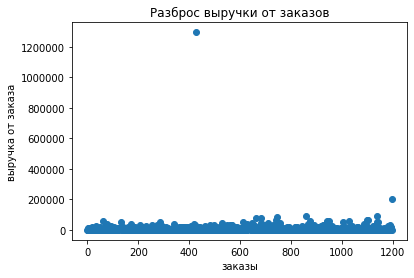

In [29]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('заказы')
plt.ylabel('выручка от заказа')

plt.title('Разброс выручки от заказов');

Есть два заказа (2000 тыс. и 1,2 млн) настолько больших, что они мешают нам осматривать данные. Установим границы.

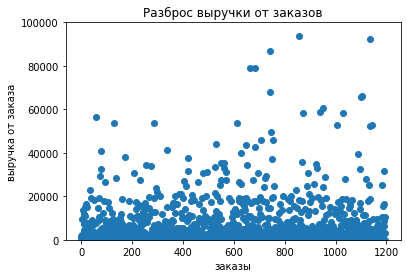

In [30]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.ylim(0, 100000)
plt.xlabel('заказы')
plt.ylabel('выручка от заказа')

plt.title('Разброс выручки от заказов');

Визуально кажется, что большинство заказов лежат в пределх до 25 тыс. руб. Посмотрим процентили.

In [31]:
print(np.percentile(orders['revenue'], [90, 95, 97.5, 99])) 

[18168.  28000.  39530.  58233.2]


В процессе очистки данных возьмем 95ый процентиль и отфильтруем заказы, которые превышают 28000.

In [32]:
orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [33]:
orders_grouped = orders.groupby('visitorId')['transactionId'].nunique()

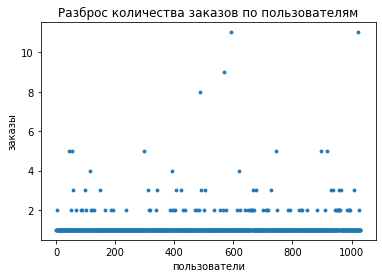

In [34]:
x_values = pd.Series(range(0,len(orders_grouped)))
plt.scatter(x_values, orders_grouped, 8) 

plt.xlabel('пользователи')
plt.ylabel('заказы')

plt.title('Разброс количества заказов по пользователям');

Выглядит так, как будто 1 и 2 заказа наиболее типичны. даже при уменьшенном размере маркера единичные заказы сливаются в сплошную линию. 

In [35]:
print(np.percentile(orders_grouped, [90, 95, 97.5, 99])) 

[1. 2. 3. 4.]


Как и предполагалось, пользователей с более чем 2 заказами не более 5%. Исключим из при дальнейшем анализе.

### Анализ статистической значимости

Проведем тест на нормальность, чтобы удостовериться, что мы имеем основания использовать непараметрические критерии при сравнении статистик по выборкам.

In [36]:
for metric in [cumulativeDataA['conversion'], 
               cumulativeDataB['conversion'], 
               cumulativeRevenueA['avg_check'], 
               cumulativeRevenueB['avg_check']]:
    print(stats.shapiro(metric)[1])

6.356380254146643e-06
0.0009982470655813813
0.00045081169810146093
0.000991184264421463


Ни один из изучаемых нами параметров, согласно критерию Шапиро-Уилка, не является нормально распределенным, мы можем в дальнейшем пользоваться непараметрическим тестом Манна-Уитни.
Ориентироваться мы будем на уровень значимости 5%, но не будем забывать, что это не самый жесткий критерий.

**Нулевая гипотеза**: не существует значимых различий между показателями средней конверсии в группе А и группе B.

**Альтернативная гипотеза**: показатели средней конверсии в группах А и B значимо различаются.

Я спросил куратора, как быть с выборками, учитывая тот факт, что тест шел не по пользователям, а по заказам.
В итоге получил следующие комментарии:
- пересекающихся пользователей можно не убирать;
- нужно сгруппировать заказы по пользователям, добавить "нулевых" пользователей (т.е. некоторое количество нулевых строк, которые отображают тех посетителей, которые не стали покупателями).
Этим и займемся.


In [37]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders'] 

visitorsPerDateA =  visitors[visitors['group'] == 'A'].groupby('date')['visitors'].sum()
visitorsPerDateB =  visitors[visitors['group'] == 'B'].groupby('date')['visitors'].sum()

sampleA = pd.concat([ordersByUsersA['orders'],
                    pd.Series(0, index=np.arange(visitorsPerDateA.sum() - len(ordersByUsersA['orders'])),
                              name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(visitorsPerDateB.sum() - len(ordersByUsersB['orders'])),
                               name='orders')],axis=0)

In [38]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.008
0.138


Мы получили p-value = 0.008, что значительно ниже 5% или 1%: это значит, что по неочищенным данным мы должны отвергнуть нулевую гипотезу об отсутствии различий между выборками: разница статистически значима. 

Расчетная разница между средними показателями конверсии - почти 14%. 

Для подсчета различий в среднем чеке просто отфильтруем датасет orders по соответствующим критерием и проведем сравнение.

Наша нулевая гипотеза - об отсутствии различий в среднем чеке между группами А и В. 
Альтернативная гипотеза -что существуют значимые различия в размере среднего чека между группами.

In [39]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],

                                          orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.365
0.259


Мы получили следующие результаты: p-value = 0.36, это значит, что вероятность случайно получить подобные различия очень высокие. 0.36 > 0.05, и мы не имеем оснований отклонять нулевую гипотезу об отсутствии различий.

Средняя разница между показателями - 26%.

Отфильтруем заказы и пользователей, которые вышли за наши рассчитанные выше границы, чтобы очистить массив от выбросов.

In [40]:
visitors_grouped = orders.groupby('visitorId')['transactionId'].nunique()
abnormal_visitors = visitors_grouped[visitors_grouped > 2].index

In [41]:
abnormal_orders = orders[orders.revenue>28000].transactionId

In [42]:
orders_clean = orders[np.logical_not(orders['visitorId'].isin(abnormal_visitors)) &
                         np.logical_not(orders['transactionId'].isin(abnormal_orders))]

Мы получили очищенный датасет orders. Теперь нам осталось повторить расчет показателей и повторить тесты.

Мы не можем аналогичным образом повлиять на visitors. Метрики несколько понизятся, зато, будем надеяться, их ценность вырастет.

Теперь пересоберем данные для анализа и повторим графики.

In [43]:
ordersAggregated_cl = datesGroups.apply(
                    lambda x: orders_clean[np.logical_and(orders_clean['date'] <= x['date'], 
                                                    orders_clean['group'] == x['group'])].
                                    agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 
                                         'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1
                                        ).sort_values(by=['date','group'])
cumulativeData_cl = ordersAggregated_cl.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData_cl.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeRevenueA_cl = cumulativeData_cl[cumulativeData_cl['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB_cl = cumulativeData_cl[cumulativeData_cl['group']=='B'][['date','revenue', 'orders']]

cumulativeRevenueA_cl['avg_check'] = cumulativeRevenueA_cl['revenue']/cumulativeRevenueA_cl['orders']
cumulativeRevenueB_cl['avg_check'] = cumulativeRevenueB_cl['revenue']/cumulativeRevenueB_cl['orders']

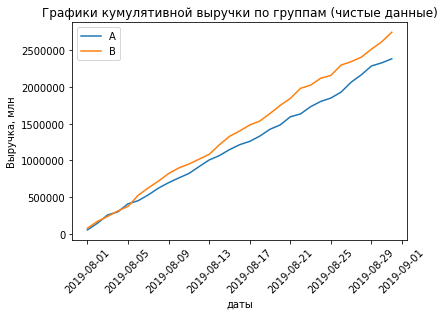

In [44]:
plt.plot(cumulativeRevenueA_cl['date'], cumulativeRevenueA_cl['revenue'], label='A')
plt.plot(cumulativeRevenueB_cl['date'], cumulativeRevenueB_cl['revenue'], label='B')
plt.legend() 
plt.xticks(rotation=45)
plt.xlabel('даты')
plt.ylabel('Выручка, млн')
plt.title('Графики кумулятивной выручки по группам (чистые данные)');

Уже с пятого числа кумулятивная выручка группы B начинает превышать выручку группы A, и разрыв постепенно увеличивается. 

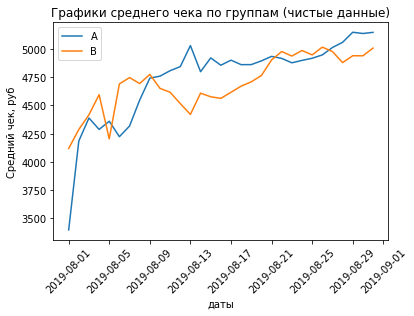

In [45]:
plt.plot(cumulativeRevenueA_cl['date'], cumulativeRevenueA_cl['revenue']/cumulativeRevenueA_cl['orders'], label='A')
plt.plot(cumulativeRevenueB_cl['date'], cumulativeRevenueB_cl['revenue']/cumulativeRevenueB_cl['orders'], label='B')
plt.legend() 
plt.xticks(rotation=45)
plt.xlabel('даты')
plt.ylabel('Средний чек, руб')
plt.title('Графики среднего чека по группам (чистые данные)');

Со средним чеком определенности не прибавилось. В целом, судя по всему, особенной разницы между группами не наблюдается.

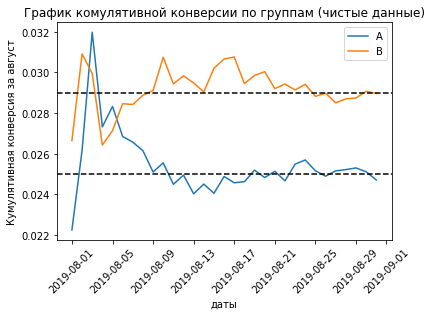

In [46]:
cumulativeData_cl['conversion'] = cumulativeData_cl['orders']/cumulativeData_cl['visitors']

cumulativeDataA_cl = cumulativeData_cl[cumulativeData_cl['group']=='A']
cumulativeDataB_cl = cumulativeData_cl[cumulativeData_cl['group']=='B']

# строим графики
plt.plot(cumulativeDataA_cl['date'], cumulativeDataA_cl['conversion'], label='A')
plt.plot(cumulativeDataB_cl['date'], cumulativeDataB_cl['conversion'], label='B')
plt.legend()

plt.xticks(rotation=45)
plt.title('График комулятивной конверсии по группам (чистые данные)')

plt.xlabel('даты')
plt.ylabel('Кумулятивная конверсия за август')

plt.axhline(y=0.029, color='black', linestyle='--') 
plt.axhline(y=0.025, color='black', linestyle='--') ;

Хорошая четкая картина: графики конверсии зафиксировались показывают заметную разницу.

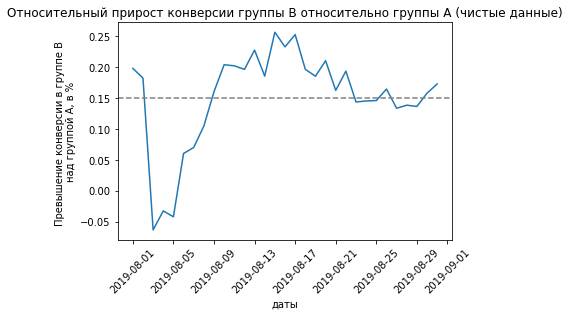

In [47]:
mergedCumulativeConversions_cl = cumulativeDataA_cl[['date','conversion']].merge(
                                cumulativeDataB_cl[['date','conversion']], 
                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions_cl['date'], 
         mergedCumulativeConversions_cl['conversionB']/mergedCumulativeConversions_cl['conversionA']-1)
plt.title("Относительный прирост конверсии группы B относительно группы A (чистые данные)")
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.xlabel('даты')
plt.ylabel('Превышение конверсии в группе B \nнад группой А, в %')
plt.xticks(rotation=45);

Относительный прирост конверсии скачет, но к концу месяца устаканивается на разнице в 15-20%. Совсем неплохо.

In [48]:
ordersByUsersA_cl = orders_clean[orders_clean['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA_cl.columns = ['visitorId', 'orders']

ordersByUsersB_cl = orders_clean[orders_clean['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB_cl.columns = ['visitorId', 'orders'] 

sampleA_cl = pd.concat([ordersByUsersA['orders'],
                    pd.Series(0, index=np.arange(visitorsPerDateA.sum() - len(ordersByUsersA['orders'])),
                              name='orders')],axis=0)

sampleB_cl = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(visitorsPerDateB.sum() - len(ordersByUsersB['orders'])),
                               name='orders')],axis=0)

**Нулевая гипотеза**: не существует значимых различий между показателями средней конверсии в группе А и группе B.

**Альтернативная гипотеза**: показатели средней конверсии в группах А и B значимо различаются.

Критический уровень значимости - 5%

In [49]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA_cl, sampleB_cl)[1]))

print("{0:.3f}".format(sampleB_cl.mean()/sampleA_cl.mean()-1)) 

0.008
0.138


На очищенных данных результат изменился: вероятность получить результат случайно равна 7%, т.е. превышает уровень значимости. Мы не имеем оснований отвергать нулевую гипотезу об отсутствии значимых различий.

Разница в среднем уровне конверсии - 17%.

**Нулевая гипотеза**: не существует значимых различий между размерами среднего чека в группе А и группе B.

**Альтернативная гипотеза**: размеры среднего чека в группах А и B значимо различаются.

Критический уровень значимости - 5%

In [50]:
print("{0:.3f}".format(stats.mannwhitneyu(orders_clean[orders_clean['group']=='A']['revenue'],

                                          orders_clean[orders_clean['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders_clean[orders_clean['group']=='B']['revenue'].mean()\
                       /orders_clean[orders_clean['group']=='A']['revenue'].mean()-1)) 

0.345
-0.027


p-value значительно превышает 5%, мы не имеем оснований отвергать нулевую гипотезу об отсутствии различий.

Сравнение средних показателей показывает, что при усреднении за период разница практически незаметна.

А вот в случае среднего чека оснований для того, чтобы отвергнуть нулевую гипотезу ("значимые различия отсутствуют") нет. 

Итоги статистического анализа:
при анализе на чистых данных мы не получили подтверждение альтернативных гипотез о наличии значимых различий в конверсии или в размере среднего чека.

### Подведение итогов теста

Проведя дополнительные исследования на данных, очищенных от больших заказов (более 28 тыс.) и аномальных пользователей (более двух заказов), мы установили следующее:
- график кумулятивной выручки четко показывает небольшой, но стабильный рост выручки в группе B;
- графики кумулятивной конверсии по группам стабилизировались, разница имеется.
- судя по графику прироста конверсии в группе B относительно группы А, есть основания говорить об увеличении конверсии на 15-20%.

При этом Тест Манна-Уитни на очищенных данных в отношении конверсии показывает p-value, превышающий установленный нами в начале эксперимента уровень значимости в 5%.
В отношении среднего чека p-value превышает 0.3 как по очищенным, так и не по очищенным данным.


На мой взгляд, тест **следует продолжить**: графический анализ показывает, что вполне есть основания говорить о том, что поведение пользователей меняется, график кумулятивной выручки плавно, но стабильно увеличивает разрыв между группами.
Я бы предложил вложить еще время в анализ ситуации, потому что если мы остановим тест сейчас, мы с очень большой вероятностью совершим ошибку второго рода и упустим возможность внести значимое изменение, которое на долгосрочном горизонте планирования может повлиять на прибыль.

Однако конечное решение в подобных ситуациях, на мой взгляд, необходимо принимать с учетом неизвестных в кейсе факторов, таких как:
- наличие других перспективных гипотез (особенно те, которые включают несовместимые изменения бизнес-процесса);
- стоимость продолжения теста;
- стоимость полномасштабного внедрения тестируемых изменений.